In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [163]:
df = pd.read_csv('bank_loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0


<h2>Banking Loan Dataset Variables</h2>
<h3>The banking loan dataset can be divided into 5 main categories as such <h3>
<h3>Applicant's Personal & Employment Details</h3>
    <ul>
        <li><b>ApplicationDate:</b> The date the loan application was submitted.</li>
        <li><b>Age:</b> The applicant's age in years.</li>
        <li><b>MaritalStatus:</b> The applicant's marital status (e.g., 'Single', 'Married').</li>
        <li><b>NumberOfDependents:</b> How many people rely on the applicant financially.</li>
        <li><b>EducationLevel:</b> The highest level of education the applicant has completed.</li>
        <li><b>EmploymentStatus:</b> The applicant's current employment situation (e.g., 'Employed', 'Self-employed').</li>
        <li><b>Experience:</b> The applicant's total years of professional experience.</li>
        <li><b>JobTenure:</b> How long the applicant has been at their current job, usually in years.</li>
        <li><b>HomeOwnershipStatus:</b> Whether the applicant rents, owns their home, or has a mortgage.</li>
    </ul>

<h3>Applicant's Financial Profile</h3>
    <ul>
        <li><b>AnnualIncome:</b> The total income the applicant earns in a year before taxes.</li>
        <li><b>MonthlyIncome:</b> The total income the applicant earns in a month before taxes.</li>
        <li><b>SavingsAccountBalance:</b> The total amount of money in the applicant's savings account.</li>
        <li><b>CheckingAccountBalance:</b> The total amount of money in the applicant's checking account.</li>
        <li><b>TotalAssets:</b> The total value of everything the applicant owns (cash, investments, property).</li>
        <li><b>TotalLiabilities:</b> The total amount of debt the applicant owes (other loans, credit card debt).</li>
        <li><b>NetWorth:</b> The applicant's total assets minus their total liabilities.</li>
        <li><b>MonthlyDebtPayments:</b> The total amount the applicant pays towards existing debts each month.</li>
    </ul>

<h3>Applicant's Credit History</h3>
    <ul>
        <li><b>CreditScore:</b> A number representing the applicant's creditworthiness.</li>
        <li><b>LengthOfCreditHistory:</b> How many years the applicant has been using credit.</li>
        <li><b>NumberOfOpenCreditLines:</b> The total number of active credit accounts the applicant has.</li>
        <li><b>CreditCardUtilizationRate:</b> The percentage of the applicant's total available credit that they are currently using.</li>
        <li><b>NumberOfCreditInquiries:</b> How many times lenders have formally checked the applicant's credit history recently.</li>
        <li><b>BankruptcyHistory:</b> Whether the applicant has ever declared bankruptcy.</li>
        <li><b>PreviousLoanDefaults:</b> The number of times the applicant has failed to repay a loan in the past.</li>
        <li><b>PaymentHistory:</b> A summary of the applicant's past payment behavior (e.g., 'All payments on time').</li>
        <li><b>UtilityBillsPaymentHistory:</b> A summary of how reliably the applicant pays their utility bills.</li>
    </ul>

<h3>Loan Details</h3>
    <ul>
        <li><b>LoanAmount:</b> The amount of money the applicant is requesting.</li>
        <li><b>LoanDuration:</b> The length of time (e.g., in months or years) over which the loan will be repaid.</li>
        <li><b>LoanPurpose:</b> The reason the applicant is seeking the loan (e.g., 'Car Loan').</li>
        <li><b>MonthlyLoanPayment:</b> The estimated amount the applicant would have to pay each month for this specific loan.</li>
    </ul>

<h3>Bank's Calculated Metrics & Decision</h3>
    <ul>
        <li><b>DebtToIncomeRatio:</b> The applicant's total monthly debt payments divided by their gross monthly income.</li>
        <li><b>TotalDebtToIncomeRatio:</b> May include the new potential loan payment in the debt-to-income calculation.</li>
        <li><b>BaseInterestRate:</b> A standard interest rate set by the bank before applicant-specific adjustments.</li>
        <li><b>InterestRate:</b> The final interest rate offered to the applicant for this loan.</li>
        <li><b>RiskScore:</b> An internal score calculated by the bank to estimate the risk of lending to this applicant.</li>
        <li><b>LoanApproved:</b> The target variable; indicates if the loan was approved (1) or denied (0).</li>
    </ul>

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [165]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


/tmp/ipykernel_16726/1165855718.py:16: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



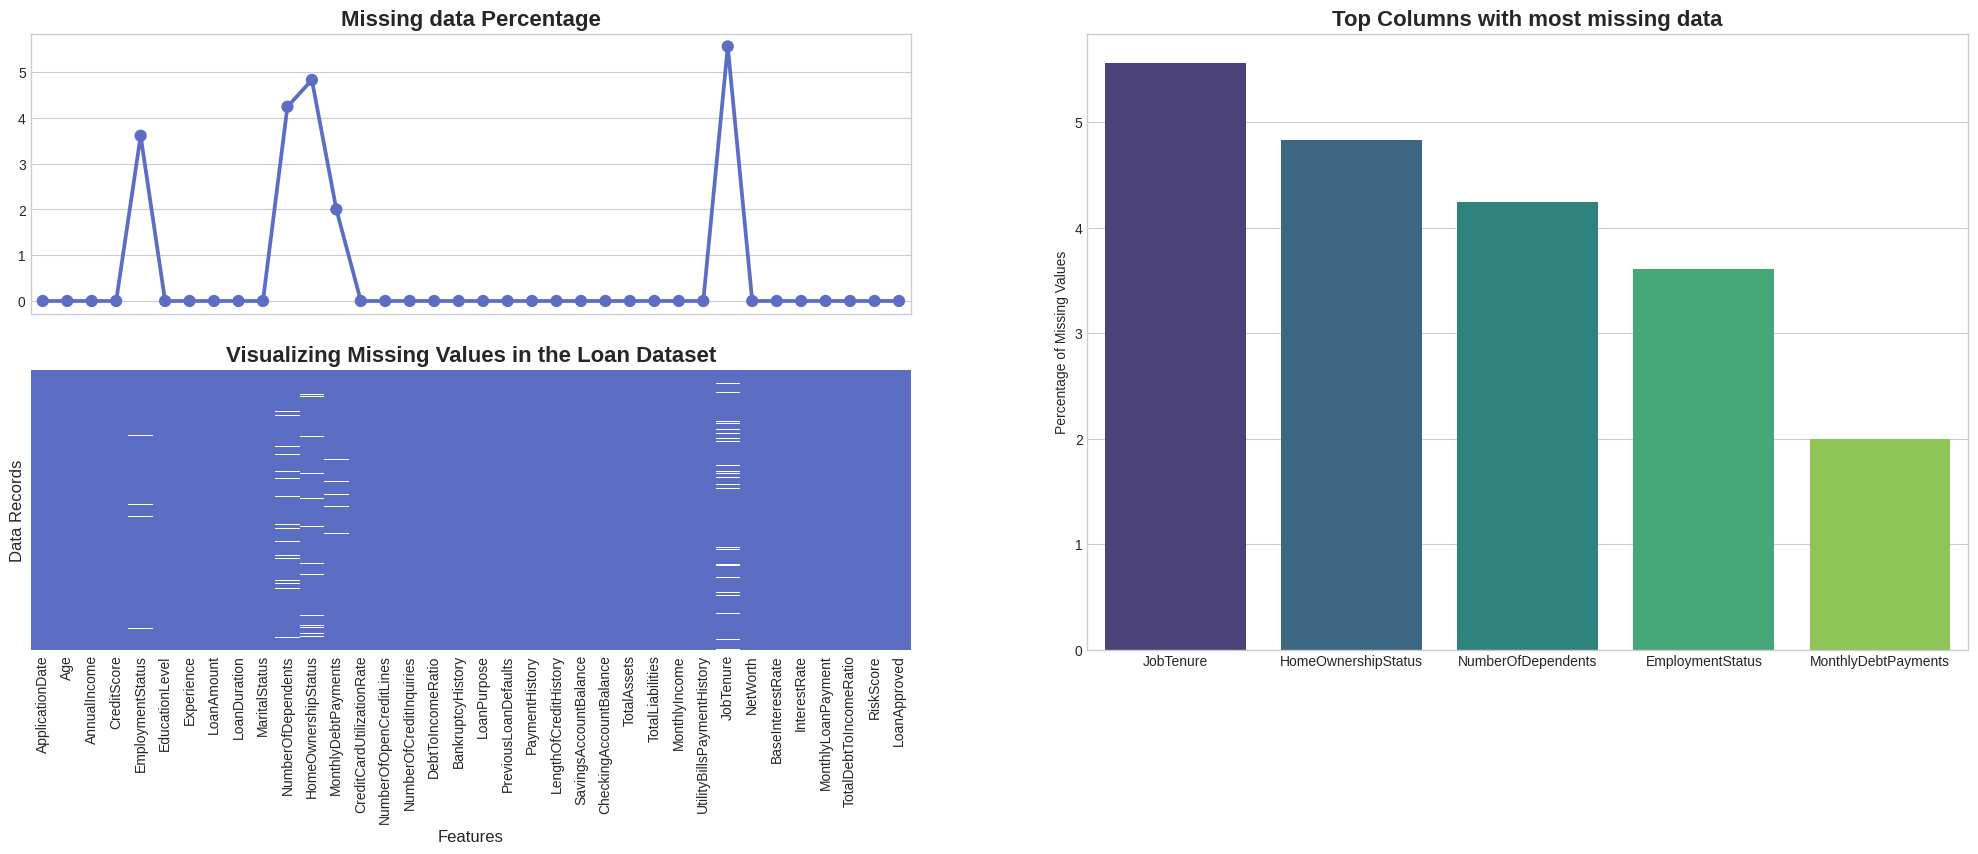

In [174]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 2, figsize=(25, 8))
null_df = df.isnull().sum() /df.shape[0] * 100
missing = null_df[null_df > 0].sort_values(ascending=False)



# --- pointplot of % of Missing Values ---
plt.subplot(2, 2, 1)
ax = sns.pointplot(x=null_df.index, y=null_df.values, color="#5b6ec4")
plt.title("Missing data Percentage", fontsize=16, weight='bold')
ax.set_xticklabels([])

# --- hbar of % of Missing Values ---
plt.subplot(1, 2, 2)
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Top Columns with most missing data", fontsize=16, weight='bold')
plt.ylabel("Percentage of Missing Values")

# --- Heatmap of Missing Values ---
bw_cmap = ListedColormap(["#5b6ec4", "white"])
plt.subplot(2, 2, 3)
sns.heatmap(df.isnull(), cbar=False, cmap=bw_cmap, yticklabels=False)
plt.title('Visualizing Missing Values in the Loan Dataset', fontsize=16, weight='bold')
plt.ylabel('Data Records', fontsize=12)
plt.xlabel('Features', fontsize=12)



plt.show()


In [ ]:
def transform_data(df):
    new_df = df.copy()
    # Convert 'ApplicationDate' to datetime
    new_df['ApplicationDate'] = pd.to_datetime(new_df['ApplicationDate'], format='%Y-%m-%d')
    new_df['ApplicationYear'] = new_df['ApplicationDate'].dt.year
    new_df['ApplicationMonth'] = new_df['ApplicationDate'].dt.month
    new_df['ApplicationDay'] = new_df['ApplicationDate'].dt.day

    new_df.drop(columns=['ApplicationDate'], inplace=True)

In [159]:
df['PaymentHistory'].max()

41